In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite/Modular/'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [3]:
path=pathy+'BM_data2022-04-27-12-01-44.h5'
# path=pathy+'AnisotropicSamp_data2022-04-27-12-38-00.h5'
# path=pathy+'Data_novol_data2022-04-27-12-43-36.h5'
# path=pathy+'1000_1500__10_data2022-04-27-13-36-38.h5'
# path=pathy+'1000_1500_5data2022-04-27-13-42-18.h5'
# path=pathy+'1000_1500_15_success_data2022-04-27-13-56-43.h5'
# path=pathy+'data2022-04-27-14-04-59.h5'
df = pd.read_hdf(path)

    



FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/BM_data2022-04-27-12-01-44.h5 does not exist

In [27]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,-1.586840,0.01034,5.005746,0.010387,-0.044546,-2.776214,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
1,-1.656107,0.01034,4.970496,0.017336,-0.235202,-2.750303,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
2,-1.718768,0.01034,4.908661,0.027707,-0.402694,-2.701547,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
3,-1.778321,0.01034,4.836549,0.008196,-0.555932,-2.640307,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
4,-1.837521,0.01034,4.770828,0.027659,-0.702504,-2.571056,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-1.326104,0.01034,4.784053,0.006590,0.648588,-2.597506,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
97,-1.385705,0.01034,4.862751,0.010574,0.498914,-2.664650,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
98,-1.446422,0.01034,4.944929,0.024701,0.340330,-2.722210,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34
99,-1.510908,0.01034,4.986818,0.010425,0.165711,-2.763696,1.0,0.5,1000,101,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_[ -90.92 -94.89 -98.48 -10...,10.34


In [28]:
path=pathy+'BM_data2022-04-27-12-01-44.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))

# path=pathy+'data2022-04-27-22-03-52.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.scatter(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)



path=pathy+'data2022-04-27-22-10-22.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=2)
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/BM_data2022-04-27-12-01-44.h5 does not exist

In [29]:
path=pathy+'smaller_W__17_500_data2022-04-27-14-20-51.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.plot(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
plt.legend()
print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/smaller_W__17_500_data2022-04-27-14-20-51.h5 does not exist

In [30]:
path=pathy+'Smaller_W_radial_data2022-04-27-14-41-02.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)
    # plt.scatter(df2['freq'], df2['SE'], label=str(th))
    # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    # plt.title('theta='+str(th*180/np.pi))
# path=pathy+'1500_1500_15_gettingthere_data2022-04-27-14-04-59.h5'
# path=pathy+'smaller_W__17_1500_data2022-04-27-14-28-10.h5'
  

# df = pd.read_hdf(path)
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     plt.plot(df2['freq'], df2['SE'], label=str(th))
#     # ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     # plt.title('theta='+str(th*180/np.pi))
# plt.legend()
# print(tss)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/Smaller_W_radial_data2022-04-27-14-41-02.h5 does not exist

In [31]:
path=pathy+'data2022-04-28-13-05-20.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=5)

path=pathy+'data2022-04-28-13-15-19.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=5)

FileNotFoundError: File /home/jfm343/Documents/Delafossites/integration_delafossite/Modular/data2022-04-28-13-05-20.h5 does not exist

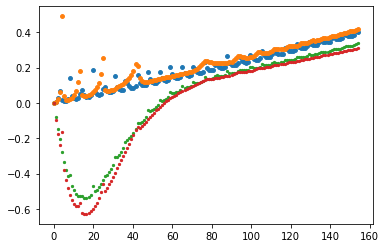

In [4]:


path=pathy+'data2022-04-28-14-05-13.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)

path=pathy+'data2022-04-28-14-08-58.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=5)

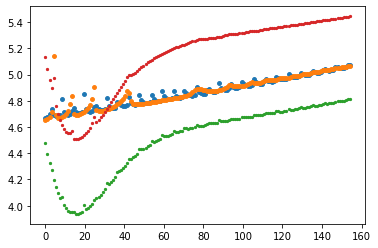

In [5]:


path=pathy+'data2022-04-28-14-05-13.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

path=pathy+'data2022-04-28-14-08-58.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=5)

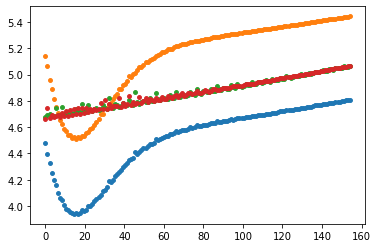

In [6]:




path=pathy+'data2022-04-28-14-57-49.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

path=pathy+'data2022-04-28-14-59-16.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE'], label=str(th), s=15)

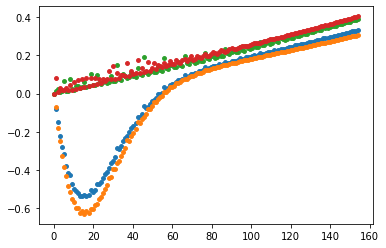

In [7]:




path=pathy+'data2022-04-28-14-57-49.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)

path=pathy+'data2022-04-28-14-59-16.h5'
df = pd.read_hdf(path)
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'], df2['SE']-df2['SE'][0], label=str(th), s=15)

Machine arg is, CH1


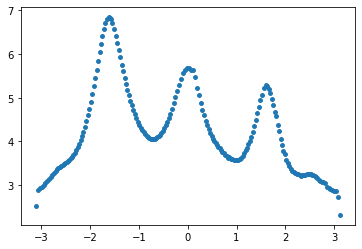

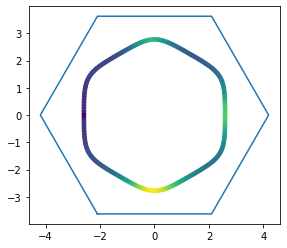

In [23]:
path=pathy+'data2022-04-28-21-06-42.h5'
df = pd.read_hdf(path)
tss=df['T'].unique()

l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()

plt.scatter(df['theta'], df['SE'],  s=15)
plt.show()
plt.plot(vx,vy)
plt.scatter(df['KFX'], df['KFY'],c=df['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


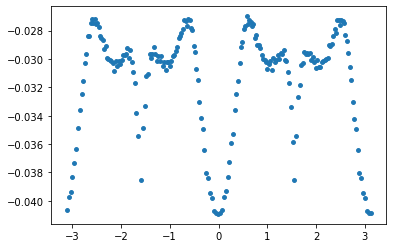

In [24]:
plt.scatter(df['theta'][2:],np.diff(df['theta'])[np.diff(df['theta'])<5],s=15)
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()